In [2]:
#import packages

import pandas as pd
import numpy as np
import os

In [3]:
#Load Train Data
train_data=pd.read_csv("D:\House price\\train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Load Test Data
test_data=pd.read_csv("D:\House price\\test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train_original=train_data.copy() 
test_original=test_data.copy()

In [8]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
train_data.shape

(1460, 81)

In [10]:
test_data.shape

(1459, 80)

In [11]:
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [12]:
test_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [13]:
percent_missing = train_data.isnull().sum() * 100 / len(train_data)
percent_missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

In [14]:
# drop the attributes which are having more than 50% null value

del train_data["Alley"]
del train_data["Fence"]
del train_data["MiscFeature"]
del train_data["PoolQC"]

In [15]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [16]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline

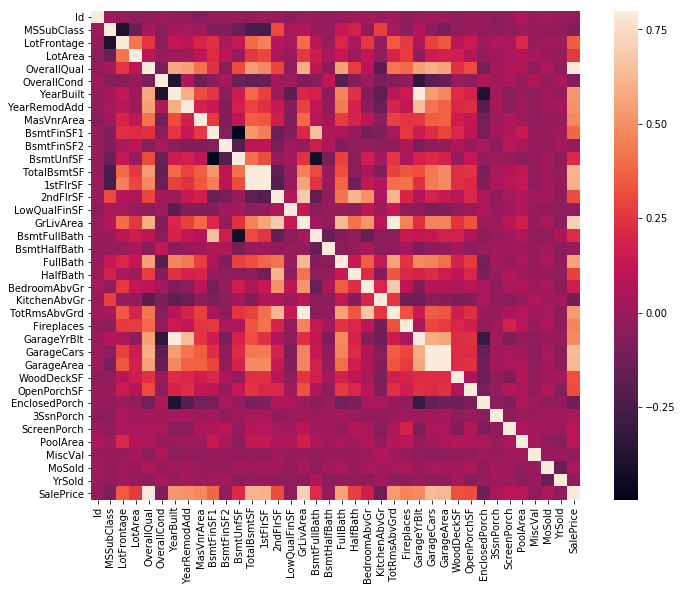

In [18]:
# Correlation Matrix Heatmap
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

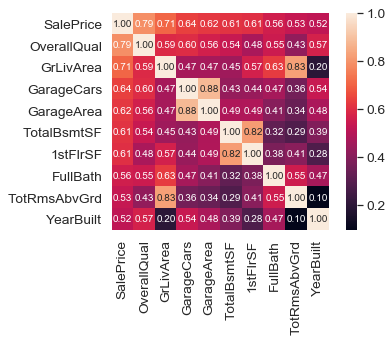

In [19]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

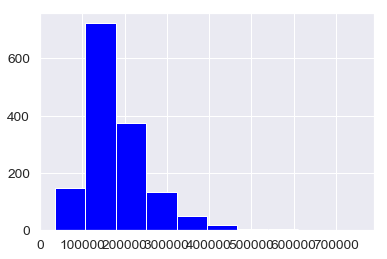

In [20]:
##the distribution is positive skewed
train_data.SalePrice.skew()
plt.hist(train_data.SalePrice, color = "blue")
plt.show()

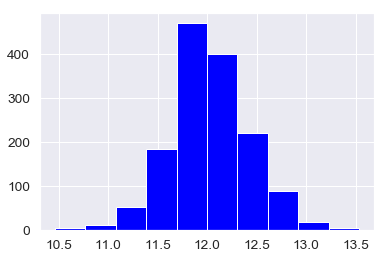

In [21]:
##sometimes it make sense to log-transform the target varible.this is improve the linear data 

target = np.log(train_data.SalePrice)
target.skew()
plt.hist(target, color = "blue")
plt.show()

In [22]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


C:\Users\sys12\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


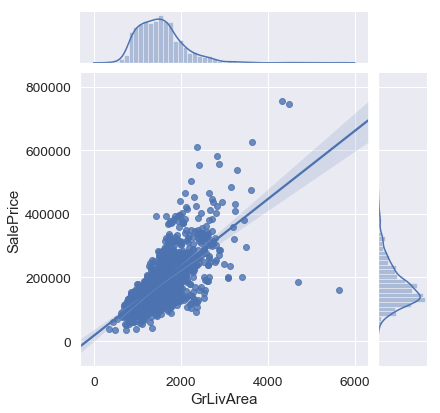

In [23]:
# Living Area vs Sale Price
sns.jointplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], kind='reg')

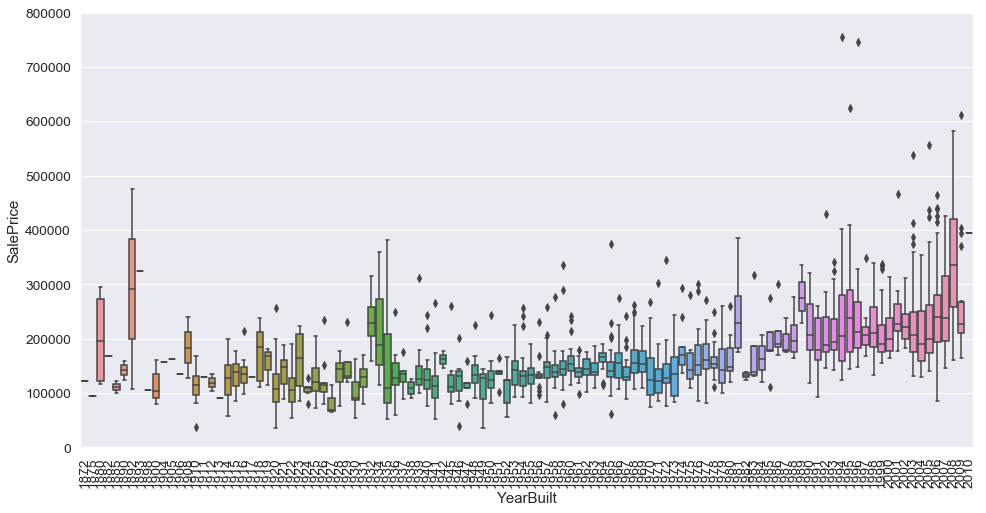

In [24]:
# Total Rooms vs Sale Price
var = 'YearBuilt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [25]:

# return a subset of columns matching the specified data types
numeric_features = train_data.select_dtypes(include=[np.number])
# numeric_features.dtypes
print(numeric_features.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [26]:
# displays the correlation between the columns and examine the correlations between the features and the target.
corr = numeric_features.corr()

# The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [27]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


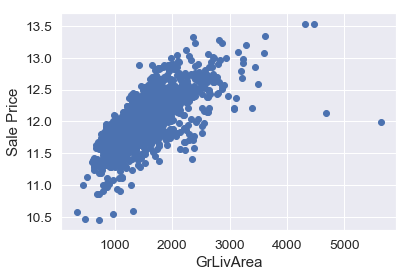

In [28]:
#to generate some scatter plots and visualize the relationship between the Ground Living Area(GrLivArea) and SalePrice
plt.scatter(x=train_data['GrLivArea'],y=target)
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()


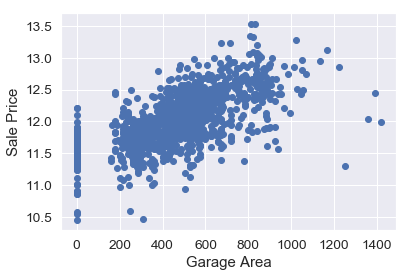

In [29]:
plt.scatter(x=train_data['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


In [30]:
#Impute the missing value on train data

train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0], inplace=True)
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
train_data['GarageType'].fillna(train_data['GarageType'].mode()[0], inplace=True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median(), inplace=True)
train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0], inplace=True)
train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0], inplace=True)
train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0], inplace=True)
train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0], inplace=True)
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median(), inplace=True)
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0], inplace=True)
train_data.isnull().sum()*100/len(train_data)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
                ... 
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond   

In [31]:
#Drop the attribute which are having more than 50% null values on test data

del test_data["Alley"]
del test_data["PoolQC"]
del test_data["Fence"]
del test_data["MiscFeature"]
test_data.shape

(1459, 76)

In [32]:
#impute the missing values on test data

test_data['LotFrontage'].fillna(test_data['LotFrontage'].median(), inplace=True)
test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0], inplace=True)
test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0], inplace=True)
test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0], inplace=True)
test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0], inplace=True)
test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].median(), inplace=True)
test_data['GarageType'].fillna(test_data['GarageType'].mode()[0], inplace=True)
test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median(), inplace=True)
test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0], inplace=True)
test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0], inplace=True)
test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0], inplace=True)
test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0], inplace=True)
test_data['Utilities'].fillna(test_data['Utilities'].mode()[0], inplace=True)
test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0], inplace=True)
test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].median(), inplace=True)
test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].median(), inplace=True)
test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0], inplace=True)
test_data['GarageCars'].fillna(test_data['GarageCars'].median(), inplace=True)
test_data['GarageArea'].fillna(test_data['GarageArea'].median(), inplace=True)
test_data['SaleType'].fillna(test_data['SaleType'].mode()[0], inplace=True)
test_data['Functional'].fillna(test_data['Functional'].mode()[0], inplace=True)
test_data.isnull().sum()*100/len(test_data)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
                ... 
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual   

In [33]:
test_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object


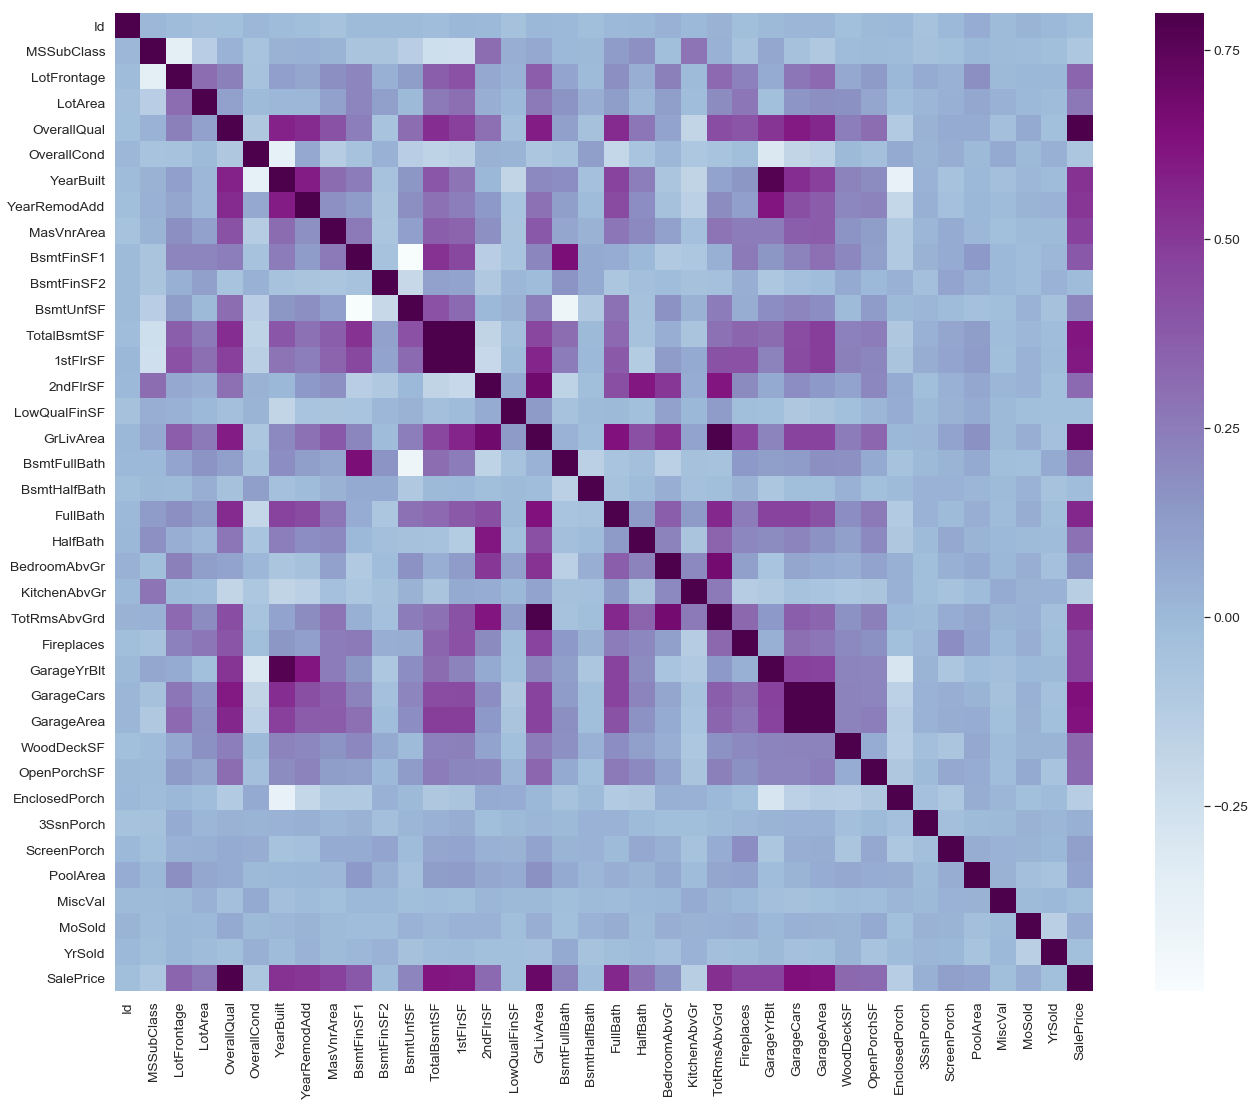

In [34]:
#Correlation

matrix = train_data.corr() 
f, ax = plt.subplots(figsize=(22, 18)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

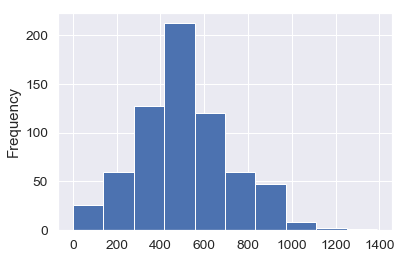

In [35]:
train_data.groupby('SalePrice')['GarageArea'].mean().plot.hist()

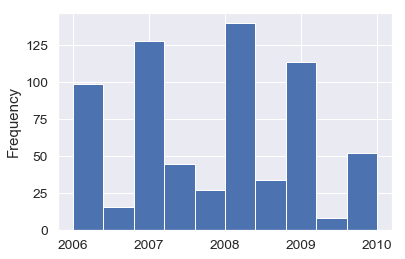

In [36]:
train_data.groupby('SalePrice')['YrSold'].mean().plot.hist()

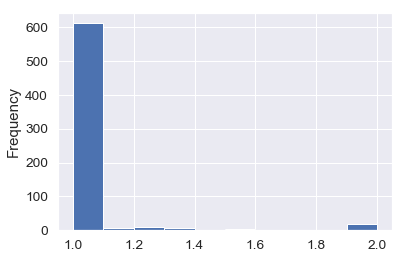

In [37]:
train_data.groupby('SalePrice')['KitchenAbvGr'].mean().plot.hist()

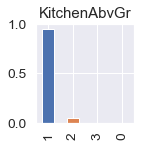

In [38]:
plt.subplot(234) 
train_data['KitchenAbvGr'].value_counts(normalize=True).plot.bar(title= 'KitchenAbvGr') 
plt.show()

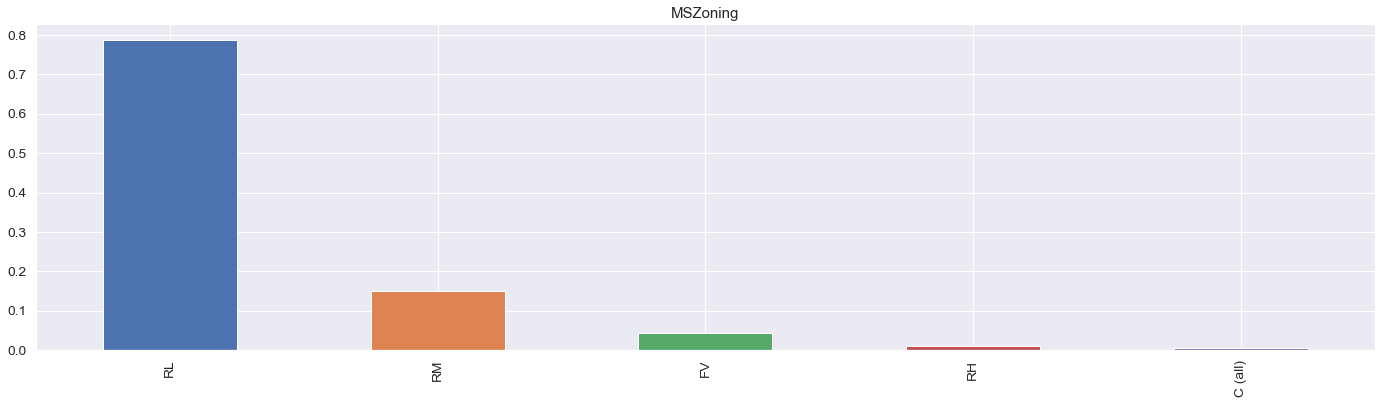

In [39]:
train_data['MSZoning'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'MSZoning') 

C:\Users\sys12\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


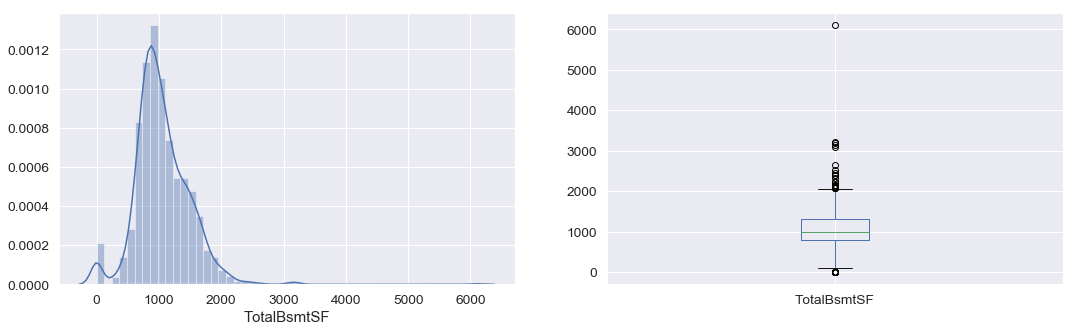

In [40]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train_data['TotalBsmtSF']); 
plt.subplot(122) 
train_data['TotalBsmtSF'].plot.box(figsize=(18,5)) 
plt.show()

In [41]:
#Drop the ID

train=train_data.drop('Id',axis=1)

In [42]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [43]:
#Label Encoder on train data

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','SaleType','SaleCondition','Heating','Electrical','GarageType','MSZoning','LandContour','Utilities',
       'LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
       'MasVnrType','Foundation')
# Process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(train_data[c].values)) 
    train_data[c] = lbl.transform(list(train_data[c].values))

# Check shape        
print('Shape all_data: {}'.format(train_data.shape))

Shape all_data: (1460, 77)


In [44]:
#Label encoder on test data

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','SaleType','SaleCondition','Heating','Electrical','GarageType','MSZoning','LandContour','Utilities',
       'LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
       'MasVnrType','Foundation')
# Process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(test_data[c].values)) 
    test_data[c] = lbl.transform(list(test_data[c].values))

# Check shape        
print('Shape all_data: {}'.format(test_data.shape))

Shape all_data: (1459, 76)


In [45]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [46]:
test_data.isnull().sum()*100/len(test_data)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
                ... 
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual   

In [47]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,5,4,8,4
1,1462,0,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,5,4,8,4
2,1463,5,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,2,4,8,4
3,1464,5,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,5,4,8,4
4,1465,11,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,0,4,8,4


In [48]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,1,2,8,4,208500
1,2,0,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,4,1,8,4,181500
2,3,5,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,8,2,8,4,223500
3,4,6,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,1,0,8,0,140000
4,5,5,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,11,2,8,4,250000


In [49]:
y = train_data["SalePrice"]
X = train_data.drop("SalePrice",1)

In [50]:
from sklearn import model_selection
test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,y, test_size=test_size, random_state=seed)

In [51]:
test_data.shape

(1459, 76)

In [52]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
forest_reg =  RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [53]:
forest_reg.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [54]:
forest_pred = forest_reg.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [56]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,forest_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, forest_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, forest_pred)))

Mean Absolute Error: 17431.037136986302
Mean Squared Error: 894824529.6530471
Root Mean Squared Error: 29913.6177961317


In [57]:
#Linear Regression

from sklearn.linear_model import LinearRegression


In [58]:
lreg = LinearRegression()

In [59]:
model_fit = lreg.fit(X_train,Y_train)

In [60]:
lr_predict = model_fit.predict(X_test)

In [61]:
mse = metrics.mean_squared_error(Y_test,lr_predict)
print("mse value:" ,mse)

mse value: 1308865980.5808794


In [62]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test,lr_predict))
print("rmse:", rmse)

rmse: 36178.25286799902


In [63]:
#Ridge Regression

from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridge_model = ridgeReg.fit(X_train,Y_train)
ridge_pred = ridge_model.predict(X_test)
mse = metrics.mean_squared_error(Y_test,ridge_pred)
print("mean_squared_error:", mse)
rmse  = np.sqrt(metrics.mean_squared_error(Y_test,ridge_pred))
print("root_mean_squared_error:" , rmse)

mean_squared_error: 1296350098.298491
root_mean_squared_error: 36004.86214802788


In [64]:
#Lasso Regression

from sklearn.linear_model import Lasso
lasso_mod = Lasso(alpha=0.3, normalize=True)
model_lasRig = lasso_mod.fit(X_train,Y_train)
lasso_pred = model_lasRig.predict(X_test)
mse = metrics.mean_squared_error(Y_test,lasso_pred)
print("mse value:" ,mse)
rmse  = np.sqrt(metrics.mean_squared_error(Y_test,lasso_pred))
print("root_mean_squared_error:" , rmse)


mse value: 1307500066.9788406
root_mean_squared_error: 36159.3703896907


In [65]:
### RF is giving better accuracy than other models

In [66]:
submission=pd.read_csv("D:\House price\\sample_submission.csv")

In [67]:
submission['SalePrice']=y 
submission['Id']=test_original['Id']

In [68]:
pd.DataFrame(submission, columns=['Id','SalePrice']).to_csv('RFSample_submission.csv')

In [69]:
submission

,Id,SalePrice
0,1461,208500
1,1462,181500
2,1463,223500
3,1464,140000
4,1465,250000
5,1466,143000
6,1467,307000
7,1468,200000
8,1469,129900
9,1470,118000
